In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [ ]:
data = pd.read_csv("airline_passenger_satisfaction.csv")
df = data.copy()
df = df.drop('ID', axis = 1)

In [ ]:
def ExploreDataset(df):
    print(f"""

-- Dataset Columns --
{df.columns.tolist()}

-- Dataset Shape--
{df.shape}

-- Is There Any NaN Values? --
{df.isna().values.any()}

-- NaN Values --
{df.isna().sum()}

-- Dataset Describe --
{df.describe()}

-- Dataset Columns Dtypes --
{df.dtypes}

-- Dataset First 5 Observation --
""")
    return df.head()

In [ ]:
ExploreDataset(df)


    
-- Dataset Columns -- 
['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay', 'Departure and Arrival Time Convenience', 'Ease of Online Booking', 'Check-in Service', 'Online Boarding', 'Gate Location', 'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment', 'Baggage Handling', 'Satisfaction']

-- Dataset Shape-- 
(129880, 23)

-- Is There Any NaN Values? --
True

-- NaN Values --
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking      

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


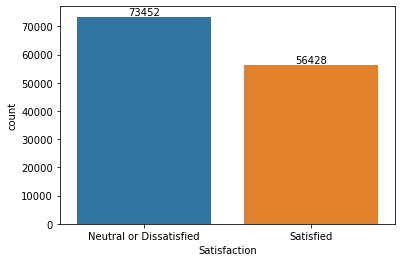

In [ ]:
s = sns.countplot(x='Satisfaction',data=df)
abs_values = df['Satisfaction'].value_counts().values

s.bar_label(container=s.containers[0], labels=abs_values);

<AxesSubplot:xlabel='Gender', ylabel='count'>

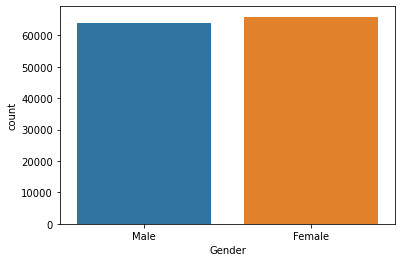

In [ ]:
# Count of customers nased on gender
sns.countplot(x='Gender ',data=df)

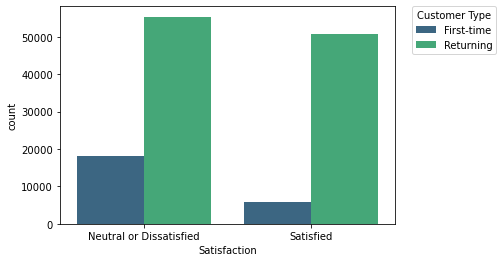

In [ ]:
sns.countplot(x='Satisfaction',data=df, hue='Customer Type', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Customer Type', borderaxespad=0.)

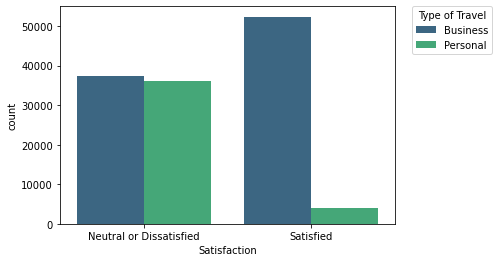

In [ ]:
sns.countplot(x='Satisfaction',data=df, hue='Type of Travel', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Type of Travel', borderaxespad=0.)

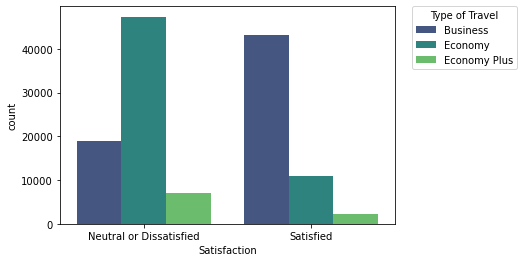

In [ ]:
sns.countplot(x='Satisfaction',data=df, hue='Class', palette='viridis')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, title= 'Type of Travel', borderaxespad=0.)

<AxesSubplot:xlabel='Type of Travel', ylabel='Age'>

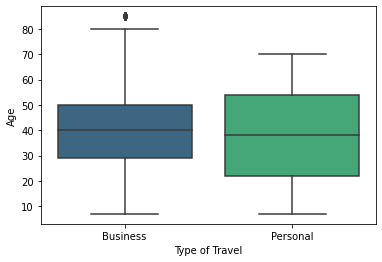

In [ ]:
sns.boxplot(x="Type of Travel", y="Age", data=df, palette="viridis")

<AxesSubplot:xlabel='Class', ylabel='Flight Distance'>

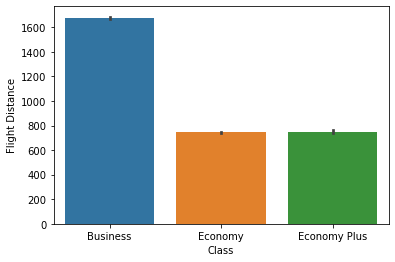

In [ ]:
sns.barplot(x='Class',y='Flight Distance',data=df)

<AxesSubplot:xlabel='Customer Type', ylabel='Flight Distance'>

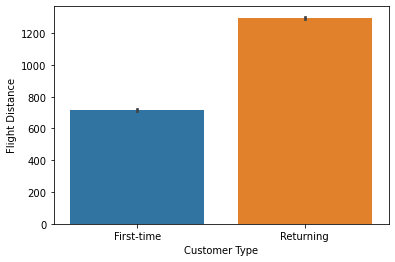

In [ ]:
sns.barplot(x='Customer Type',y='Flight Distance',data=df)

<AxesSubplot:>

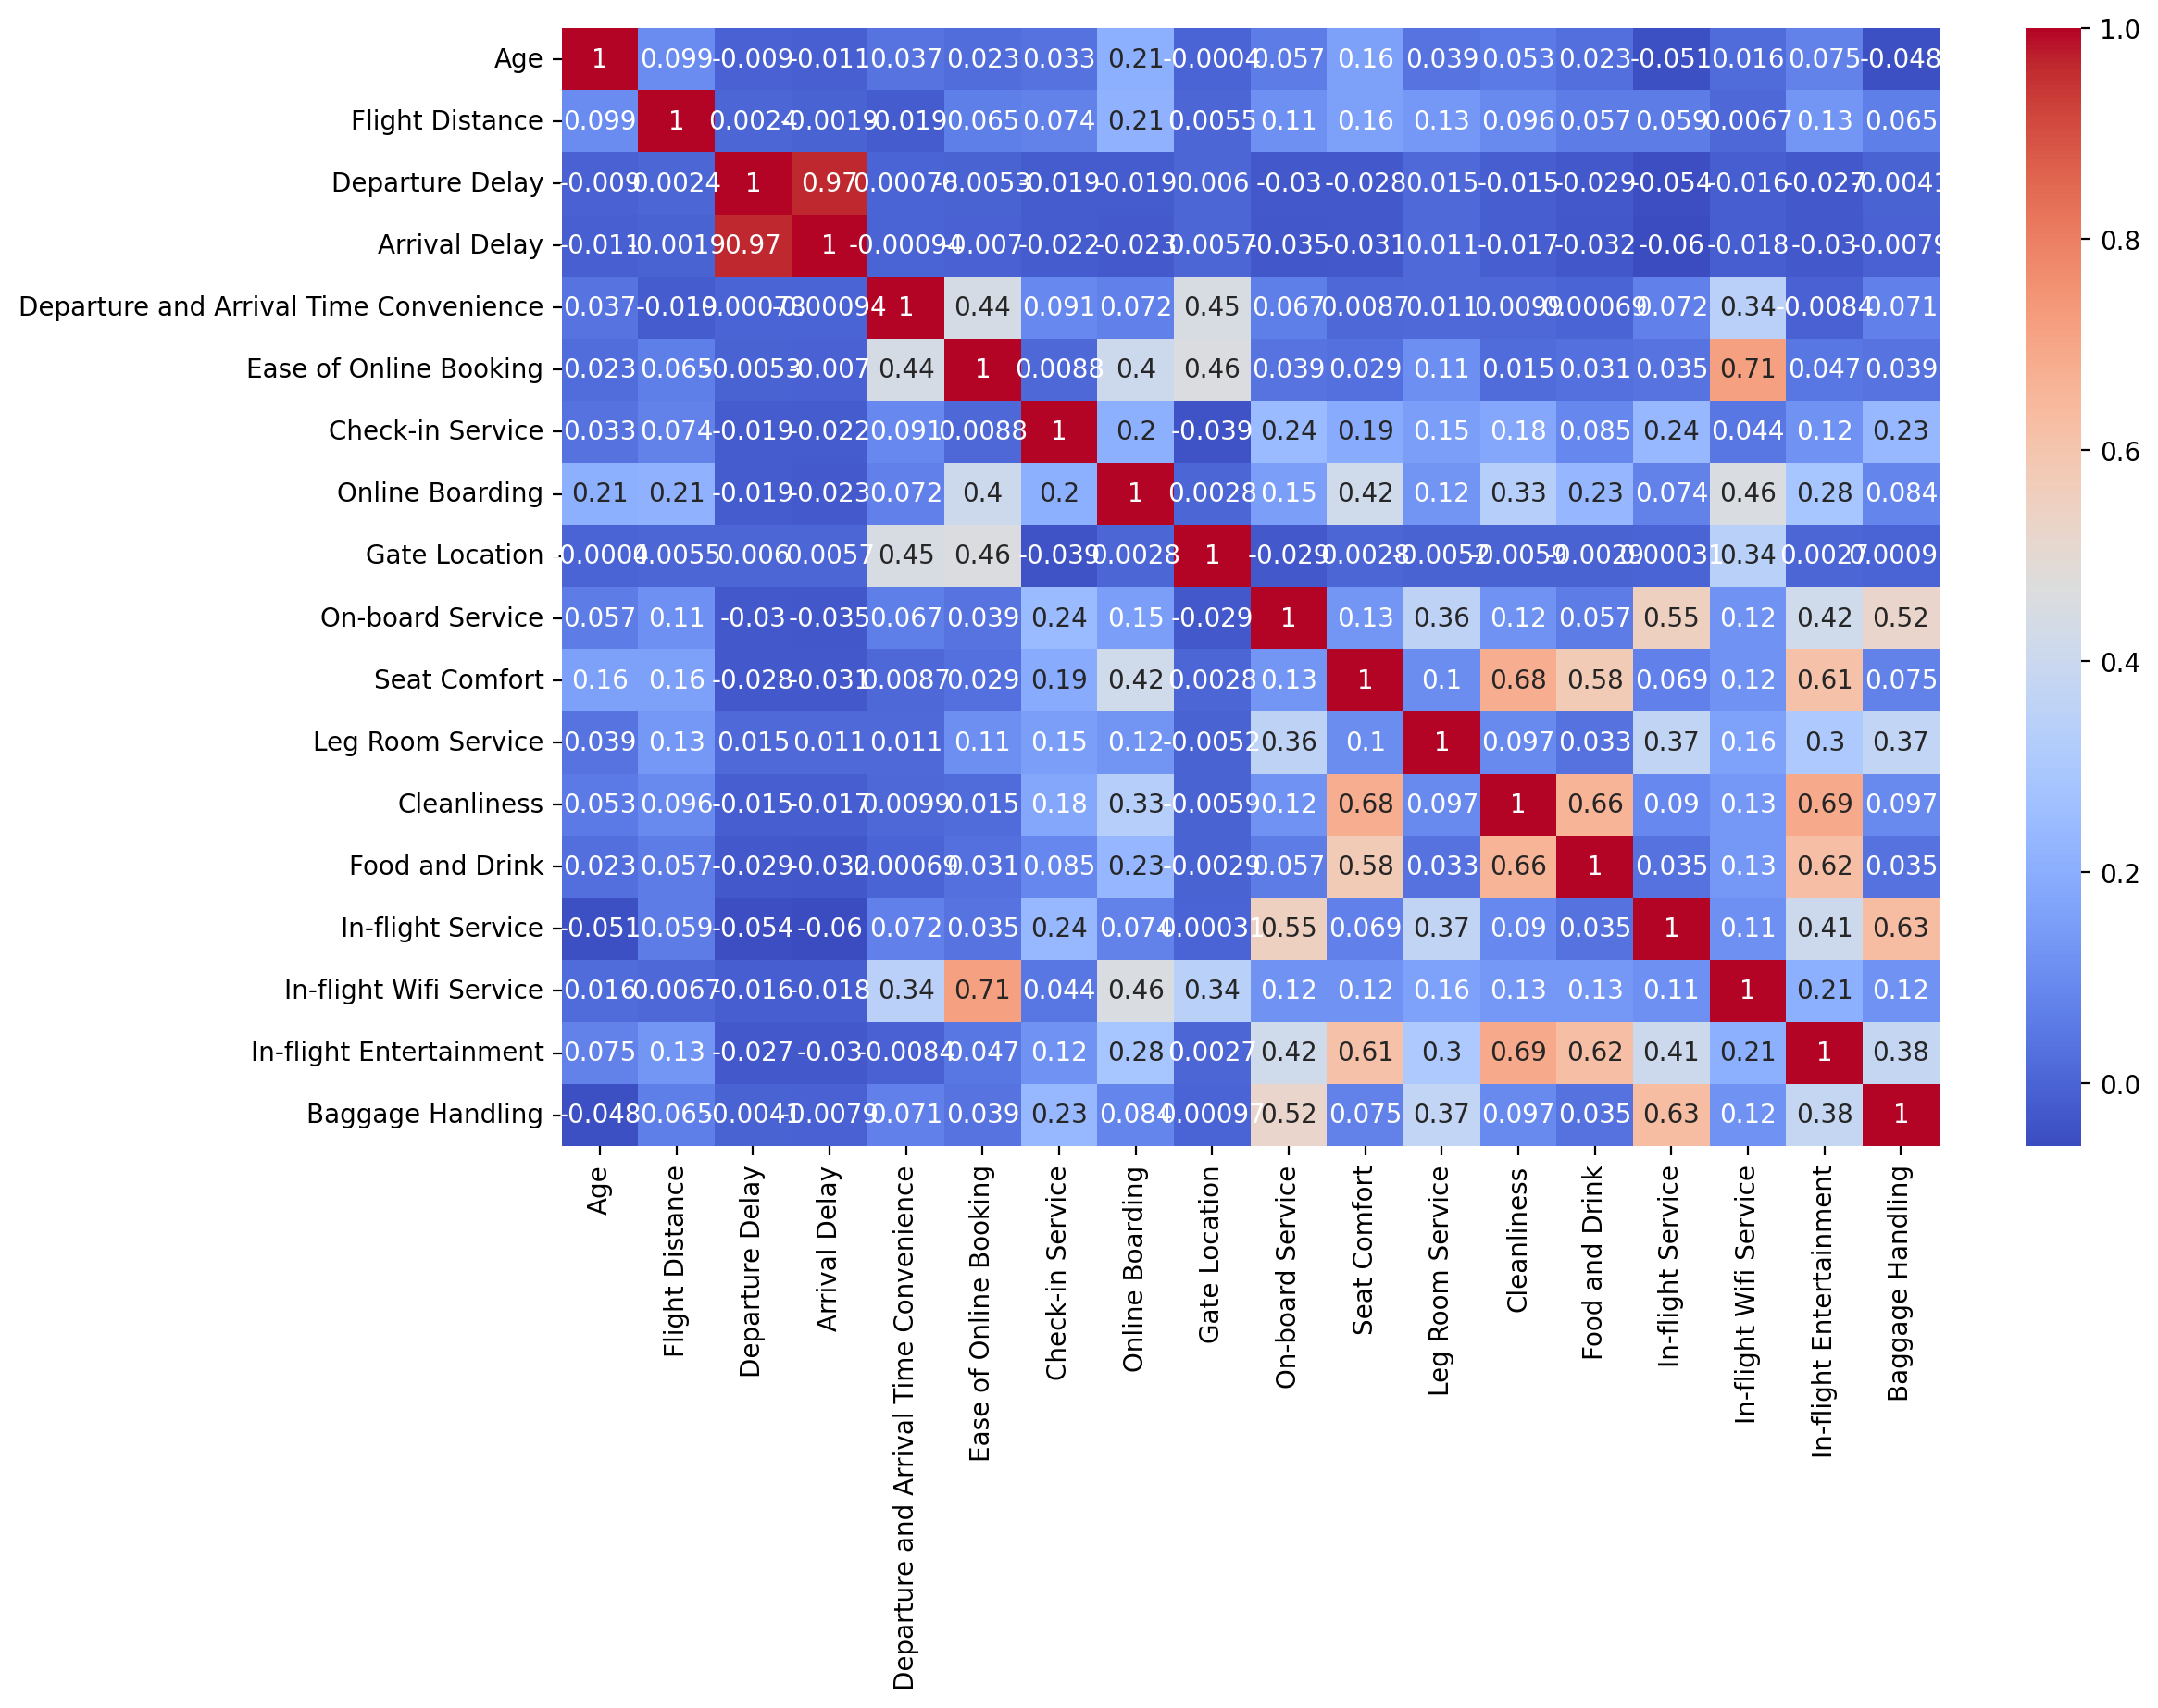

In [ ]:
plt.figure(figsize=(12,8), dpi =200)
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [ ]:
df['Arrival Delay'] = df['Arrival Delay'].fillna(value = df['Arrival Delay'].mean())

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,48,821,2,5.0,3,3,4,3,3,3,...,5,3,5,5,1,0,0,0,0,0
1,35,821,26,39.0,2,2,3,5,2,5,...,5,2,5,5,0,1,0,0,0,1
2,41,853,0,0.0,4,4,4,5,4,3,...,3,4,3,3,1,1,0,0,0,1
3,50,1905,0,0.0,2,2,3,4,2,5,...,5,2,5,5,1,1,0,0,0,1
4,49,3470,0,1.0,3,3,3,5,3,3,...,3,3,3,3,0,1,0,0,0,1


In [ ]:
X = df.drop('Satisfaction_Satisfied',axis=1)
y = df['Satisfaction_Satisfied']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=101)

In [ ]:
scaler = StandardScaler()
scld_X_train = scaler.fit_transform(X_train)
scld_X_test = scaler.transform(X_test)

In [ ]:
parameters = {
        'n_estimators': [100, 500],
        'subsample': [0.8, 1.0],
        'gamma' : [0,1,5],
        'max_depth': [3, 4, 5],
        'learning_rate': [0.1, 0.3]}

In [ ]:
xgboost_model = XGBClassifier()
xgboost_cv = GridSearchCV(xgboost_model, parameters, cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
xgboost_cv.fit(scld_X_train,y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [ ]:
best = xgboost_cv.best_params_
best

{'gamma': 5,
 'learning_rate': 0.1,
 'max_depth': 5,
 'n_estimators': 500,
 'subsample': 0.8}

In [ ]:
xgboost_model2 = XGBClassifier(gamma=5, learning_rate = 0.1, max_depth = 5, n_estimators = 500, subsample = 0.8)
xgb_tunned = xgboost_model2.fit(scld_X_train, y_train)

Classification Report:               precision    recall  f1-score   support

           0       0.96      0.98      0.97     21937
           1       0.97      0.94      0.96     17027

    accuracy                           0.96     38964
   macro avg       0.96      0.96      0.96     38964
weighted avg       0.96      0.96      0.96     38964



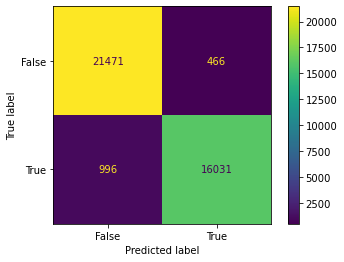

In [ ]:
y_pred = xgb_tunned.predict(scld_X_test)

print(f'Classification Report: {classification_report(y_test,y_pred)}')
confusion_matrix = metrics.confusion_matrix(y_test,y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.grid(False)
plt.show()


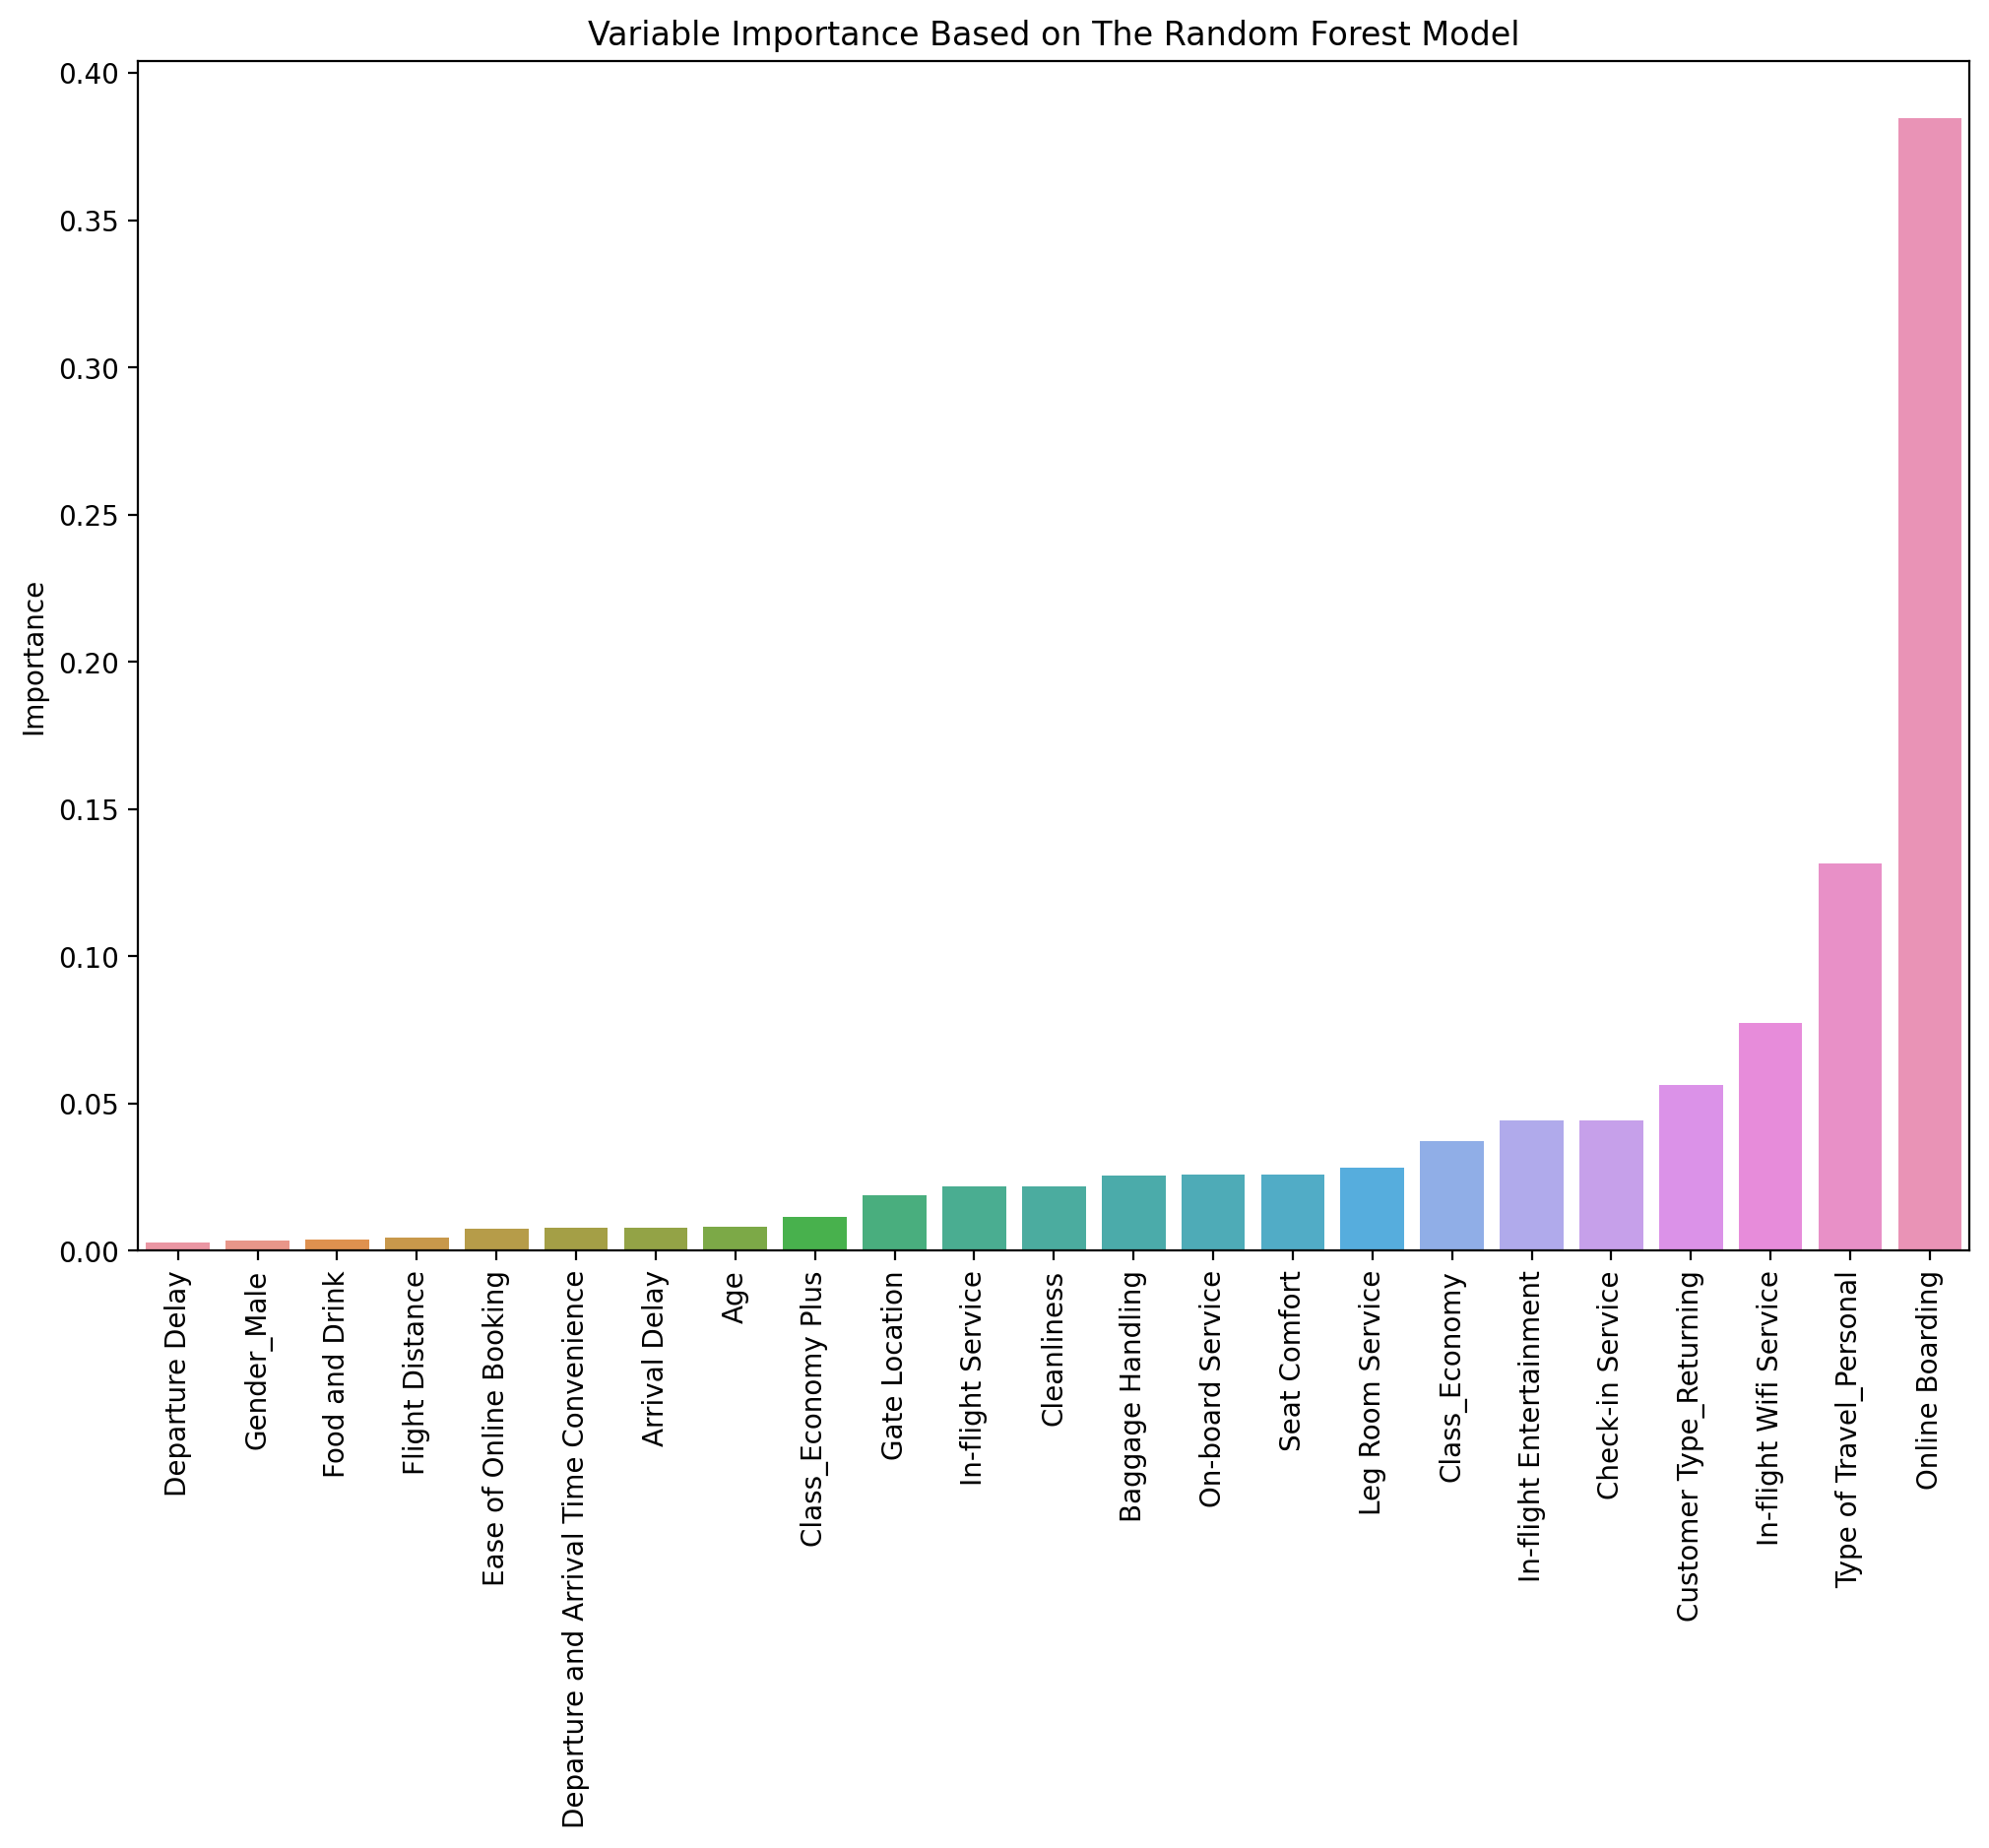

In [ ]:
var_importance = pd.DataFrame(index=X.columns,data=xgb_tunned.feature_importances_.reshape(-1,1),columns=['Importance'])
plt.figure(figsize=(12,8),dpi=200)
sns.barplot(data=var_importance.sort_values('Importance'),x=var_importance.sort_values('Importance').index,y='Importance')
plt.title('Variable Importance Based on The Random Forest Model')
plt.xticks(rotation=90);